This notebook is an example of EBSD scan processing. Here we only process a small region of interest to speed up the calculation, but the processing can (and is usually done) on the whole map. The processing (done using the `OimScan` class) basically consist in loading the data, creating the crysallographic phases and segmenting the grains. Note that from the user point of view, the processing is usually done with the `Microstructure` class using the `from_ebsd` function (see the end of the notebook for this).

In [1]:
from pymicro.crystal.ebsd import OimScan
from pymicro.crystal.lattice import Lattice, CrystallinePhase, Symmetry
from pymicro.crystal.microstructure import Microstructure
import numpy as np
from matplotlib import pyplot as plt, cm
import pymicro
print (pymicro.__file__)
import sys
print(sys.path)

C:\Users\esteb\Desktop\Projet info S2\pymicro\pymicro\crystal\rotation.py:189: RuntimeWarning: invalid value encountered in divide
  axis = rod / r


C:\Users\esteb\Desktop\Projet info S2\pymicro\pymicro\__init__.py
['c:\\Users\\esteb\\Desktop\\Projet info S2', 'C:\\Users\\esteb\\Desktop\\Projet info S2\\pymicro', 'C:\\Users\\esteb\\Desktop\\basictools\\basic-tools\\src', 'c:\\miniconda\\python311.zip', 'c:\\miniconda\\DLLs', 'c:\\miniconda\\Lib', 'c:\\miniconda', '', 'c:\\miniconda\\Lib\\site-packages', 'c:\\miniconda\\Lib\\site-packages\\win32', 'c:\\miniconda\\Lib\\site-packages\\win32\\lib', 'c:\\miniconda\\Lib\\site-packages\\Pythonwin']


### Using the OimScan class

In [2]:
roi, ds = None, 1
roi, ds = [300,700,700,1000], 2 #ex de base 300 700 700 1000 2 ex grand 300 900 400 1000 1
scan = OimScan.from_file('EBSD_T40_.ctf', crop=(roi, ds), use_spatial_ref_frame=True)

EBSD_T40_ .ctf
using ref_frame 4
guessed symmetry from lattice parameters: Symmetry.hexagonal
adding phase Phase 1 (Ti-Hex) 
	-- Lattice (Symmetry.hexagonal) a=0.300, b=0.300, c=0.470 alpha=90.0, beta=90.0, gamma=120.0
hexagonal symmetry, adding 30 degrees rotation around c-axis
importing data from region [300, 700, 700, 1000]
downsampling data by a factor 2
using spatial reference frame for orientation data


changing orientation reference frame progress: 100%|██████████| 29313/29313 [00:05<00:00, 5663.01it/s]

In [3]:
scan

EBSD scan of size 200 x 150
|- spatial resolution: x=0.5, y=0.5
|- phase 1 (Symmetry.hexagonal)

In [4]:
def eu2qu_series(euler):
    """Transform a series of euler angles into quaternions.

    :param ndarray euler: the (n, 3) shaped array of Euler angles (radians).
    :returns: a (n, 4) array with the quaternions.
    """
    if euler.ndim != 2 or euler.shape[1] != 3:
        raise ValueError('Wrong shape for the euler array: %s -> should be (n, 3)' % euler.shape)
    phi1, Phi, phi2 = np.squeeze(np.split(euler, 3, axis=1))
    q0 = np.cos(0.5 * (phi1 + phi2)) * np.cos(0.5 * Phi)
    q1 = np.cos(0.5 * (phi1 - phi2)) * np.sin(0.5 * Phi)
    q2 = np.sin(0.5 * (phi1 - phi2)) * np.sin(0.5 * Phi)
    q3 = np.sin(0.5 * (phi1 + phi2)) * np.cos(0.5 * Phi)
    if q0 < 0:
        # the scalar part must be positive
        q.quat = q.quat * -1
    # ambiguous rotation
    if q.quat[0] < 3 * epsilon:
        axis = upper_hemishpere_axis(q.quat[1:])
        q.quat = np.array([0., *axis])
    return q.quat


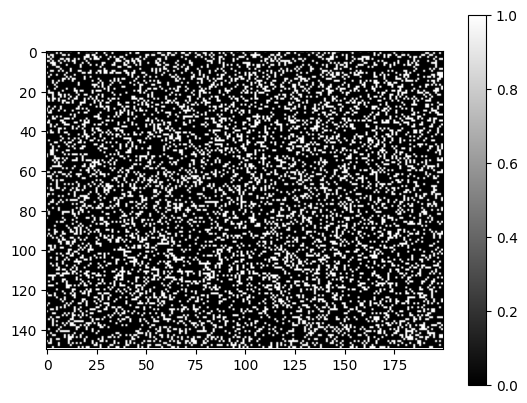

In [5]:
plt.imshow((scan.ci > 0.2).T, cmap=cm.gray)
plt.colorbar()

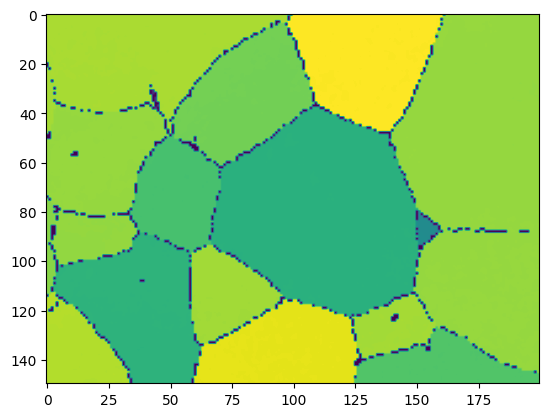

In [6]:
plt.imshow(scan.euler[:, :, 0].T)

In [7]:
# this can be long for the full EBSD data set
scan.compute_ipf_maps()

computing IPF maps for phase 1 (Symmetry.hexagonal): 100%|██████████| 29313/29313 [00:10<00:00, 2865.05it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


c:\miniconda\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


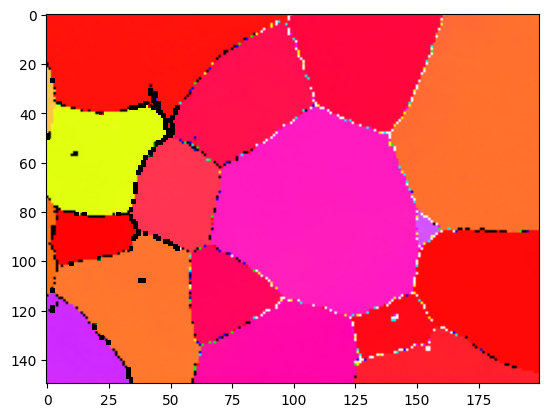

In [8]:
plt.imshow(scan.ipf100.transpose(1, 0, 2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


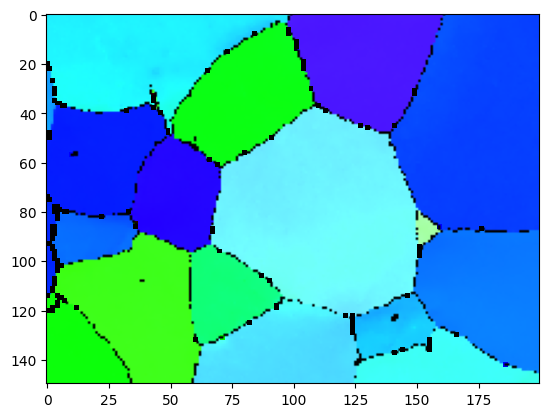

In [9]:
plt.imshow(scan.ipf010.transpose(1, 0, 2))

In [10]:
from pymicro.crystal.microstructure import Crystal
Crystal.fun_test()

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 8.66025404e-01,  0.00000000e+00,  0.00000000e+00,
         5.00000000e-01],
       [ 5.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         8.66025404e-01],
       [ 6.12323400e-17,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 5.00000000e-01,  0.00000000e+00, -0.00000000e+00,
        -8.66025404e-01],
       [ 8.66025404e-01,  0.00000000e+00, -0.00000000e+00,
        -5.00000000e-01],
       [ 6.12323400e-17,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.12323400e-17,  8.66025404e-01,  5.00000000e-01,
         3.06161700e-17],
       [ 6.12323400e-17,  5.00000000e-01,  8.66025404e-01,
         5.30287619e-17],
       [ 6.12323400e-17,  6.12323400e-17,  1.00000000e+00,
         6.12323400e-17],
       [ 6.12323400e-17,  5.00000000e-01, -8.66025404e-01,
        -5.30287619e-17],
       [ 6.12323400e-17,  8.66025404e-01, -5.00000000e-01,
      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 280 is out of bounds for axis 1 with size 150

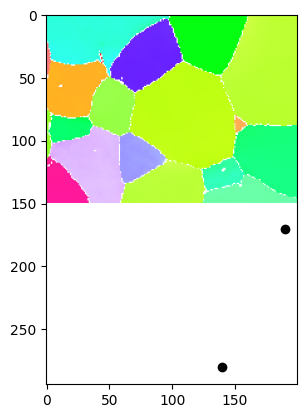

In [11]:
from pymicro.crystal.microstructure import Orientation
from pymicro.crystal.rotation import om2ro, ro2qu, qu2om, om2qu, qu2ax_angle, qu2om_vect, om2qu_vect, om2eu, eu2om, eu2ro
from pymicro.crystal.microstructure import Q_conjugate, Q_product, Q_product_vect
plt.imshow(scan.ipf001.transpose(1, 0, 2))

x1, y1 = 140,280
x2, y2 = 190,170
plt.plot(x1, y1,'ko')
plt.plot(x2, y2,'ko')
o1 = Orientation.from_euler(np.degrees(scan.euler[x1, y1,:]))
o2 = Orientation.from_euler(np.degrees(scan.euler[x2, y2,:]))

print(Orientation.disorientation(o1,o2, crystal_structure=Symmetry.cubic))
print(Orientation.Q_disorientation(o1,o2, crystal_structure=Symmetry.cubic))

In [12]:
print(o1)

NameError: name 'o1' is not defined

In [13]:
print(qu2om(om2qu(o1.orientation_matrix())))

NameError: name 'o1' is not defined

In [14]:
i=3
j=10
crystal_structure = Symmetry.cubic
sym = crystal_structure.symmetry_operators()
Q_sym = crystal_structure.Q_symmetry_operators()

M = np.dot(sym[i], sym[j])
q = Q_product(Q_sym[j], Q_sym[i])

print(om2qu(M))
print(q)

print(Q_product(Q_conjugate(q), Q_product((o1.quaternion()), q)))
print(om2qu(np.dot(np.dot(M, o1.orientation_matrix()), M.T)))
#4,5,8,11,14,18 cubic
#4,5 hexagonal
#1 tetragonal

[ 6.12323400e-17  7.07106781e-01 -7.07106781e-01 -4.32978028e-17]
[ 0.00000000e+00 -7.07106781e-01  7.07106781e-01  8.65956056e-17]


NameError: name 'o1' is not defined

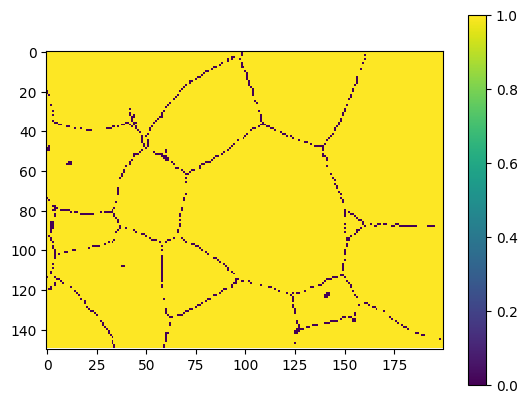

In [15]:
plt.imshow((scan.phase).T, interpolation='nearest')
plt.colorbar()
plt.show()

In [16]:
# CI field is not meaningful here
scan.ci = scan.phase.copy().astype(float)
scan.ci.min(), scan.ci.max()

(0.0, 1.0)

In [17]:
scan.segment_grains(tol=5., min_ci=0.0)

grain segmentation for EBSD scan, misorientation tolerance=5.0, minimum confidence index=0.0
segmentation progress: 100.00 %
23 grains were segmented


array([[ 1,  1,  1, ..., 19, 19, 19],
       [ 1,  1,  1, ..., 19, 19, 19],
       [ 1,  1,  1, ..., 19, 19, 19],
       ...,
       [ 3,  3,  3, ..., 22, 22, 22],
       [ 3,  3,  3, ..., 22, 22, 22],
       [ 3,  3,  3, ..., 22, 22, 22]])

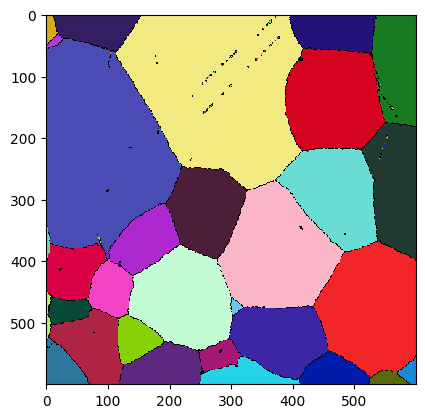

In [18]:
# plot the segmented grain structure using a random color map: each color represents a grain
rand_cmap = Microstructure.rand_cmap(first_is_black=True)
plt.imshow(scan.grain_ids.T, cmap=rand_cmap, interpolation='nearest')
plt.show()

In [19]:
# observe that the crystal symmetry is hexagonal
sym = scan.phase_list[0].get_symmetry()
print(sym)

Symmetry.hexagonal


In [20]:
from pymicro.crystal.microstructure import Orientation

# compute the disorientation between grains 2 and 3
print(scan.grain_ids[125, 20])
o2 = Orientation.from_euler(np.degrees(scan.euler[125, 20, :]))
print(scan.grain_ids[175, 50])
o3 = Orientation.from_euler(np.degrees(scan.euler[175, 50, :]))
mis_angle = np.degrees(o2.disorientation(o3, crystal_structure=sym)[0])
print('misorientation between grains 2 and 3 is %.1f degrees' % mis_angle)

2
3
misorientation between grains 2 and 3 is 26.1 degrees


### Using the Microstructure class

In [4]:
from pymicro.crystal.microstructure import Microstructure

# directly import the EBSD data, here we chose not to take the confidence index into account
m = Microstructure.from_ebsd('EBSD_T40_.ctf', roi=[300, 700, 700, 1000], ds=1, tol=5., min_ci=-1.)

0 phases found in the data set
new phase added: unknown
EBSD_T40_ .ctf
using ref_frame 4
guessed symmetry from lattice parameters: Symmetry.hexagonal
adding phase Phase 1 (Ti-Hex) 
	-- Lattice (Symmetry.hexagonal) a=0.300, b=0.300, c=0.470 alpha=90.0, beta=90.0, gamma=120.0
hexagonal symmetry, adding 30 degrees rotation around c-axis
importing data from region [300, 700, 700, 1000]
using spatial reference frame for orientation data


changing orientation reference frame progress: 100%|██████████| 117254/117254 [00:20<00:00, 5633.12it/s]




0 phases found in the data set
new phase added: Ti-Hex
grain segmentation for EBSD scan, misorientation tolerance=5.0, minimum confidence index=-1.0
segmentation progress: 100.00 %
27 grains were segmented





creating new grains: 100%|██████████| 27/27 [02:21<00:00,  5.26s/it]


computing grains geometry


In [5]:
# typical use: get rid of the very small, spurious grains
m.remove_small_grains(min_volume=1)

In [6]:
# fill the holes by dilating the grains
m.dilate_grains(dilation_steps=3)

2662 voxels to replace
dilation step 1 done
78 voxels to replace
dilation step 2 done
12 voxels to replace
dilation step 3 done


In [7]:
m.view_slice(show_grain_ids=True, unit='pixel')

ModuleNotFoundError: No module named 'skimage'

In [22]:
m.view_slice(show_lattices=True, color='ipf', axis=[0, 0, 1], unit='pixel')

ModuleNotFoundError: No module named 'skimage'

In [23]:
m.view_slice(show_lattices=True, color='ipf', axis=[1, 0, 0], unit='pixel')

ModuleNotFoundError: No module named 'skimage'

#### Quaternion conversions

Sample code bits to start vectorizing quaternion conversions and utilization.

In [95]:
epsilon = np.finfo('float').eps

def up_axis(axis):
    if abs(axis[2]) > epsilon:
        if axis[2] < 0.:
            # reverse axis
            return -1. * axis
    elif abs(axis[1]) > epsilon:
        if axis[1] < 0:
            # reverse axis and zero z component
            return np.array([-axis[0], -axis[1], 0.])
    elif axis[0] < 0.:
        # reverse axis and zero y and z components
        return np.array([-axis[0], 0., 0.])
    return axis

In [67]:
%%time
from pymicro.crystal.rotation import eu2qu

# classical approach with a double for loop
scan.quats = np.empty((list(scan.iq.shape) + [4]), float)
for i in range(200):
    for j in range(150):
        scan.quats[i, j] = eu2qu(scan.euler[i, j])

CPU times: user 438 ms, sys: 109 ms, total: 547 ms
Wall time: 412 ms


In [100]:
%%time

# vectorized code
eulers = np.reshape(scan.euler, (np.prod(scan.iq.shape), 3))
print(eulers.shape)
phi1, Phi, phi2 = np.squeeze(np.split(eulers, 3, axis=1))
q0 = np.cos(0.5 * (phi1 + phi2)) * np.cos(0.5 * Phi)
q1 = np.cos(0.5 * (phi1 - phi2)) * np.sin(0.5 * Phi)
q2 = np.sin(0.5 * (phi1 - phi2)) * np.sin(0.5 * Phi)
q3 = np.sin(0.5 * (phi1 + phi2)) * np.cos(0.5 * Phi)
quats = np.array([q0, q1, q2, q3]).T
# the scalar part must be positive
quats = quats * np.sign(q0).reshape([-1, 1])
# handle ambiguous rotation
ambig = np.where(quats[:, 0] < 3 * epsilon)[0]
for i in ambig:
    axis = up_axis(quats[i, 1:])
    quats[i] = np.array([0., *axis])
quats = quats.reshape(scan.quats.shape)
quats.shape

(30000, 3)
CPU times: user 7.86 ms, sys: 0 ns, total: 7.86 ms
Wall time: 7.05 ms


(200, 150, 4)

In [101]:
scan.quats[10:20, 100, :]

array([[0.046273  , 0.694397  , 0.06642312, 0.71502419],
       [0.04687285, 0.6945106 , 0.06622665, 0.71489299],
       [0.04605737, 0.69462841, 0.06594551, 0.71485752],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.25009336, 0.85137819, 0.17452051, 0.42679162],
       [0.25104799, 0.85124534, 0.17376268, 0.42680536],
       [0.25111993, 0.85065407, 0.17480916, 0.42751396],
       [0.25137591, 0.85057524, 0.17335452, 0.42811227],
       [0.25128357, 0.85010739, 0.17564728, 0.42816121]])

In [102]:
quats[10:20, 100, :]

array([[0.046273  , 0.694397  , 0.06642312, 0.71502419],
       [0.04687285, 0.6945106 , 0.06622665, 0.71489299],
       [0.04605737, 0.69462841, 0.06594551, 0.71485752],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.25009336, 0.85137819, 0.17452051, 0.42679162],
       [0.25104799, 0.85124534, 0.17376268, 0.42680536],
       [0.25111993, 0.85065407, 0.17480916, 0.42751396],
       [0.25137591, 0.85057524, 0.17335452, 0.42811227],
       [0.25128357, 0.85010739, 0.17564728, 0.42816121]])

**Test avec Nickel_superalloy**

In [22]:
roi, ds = None, 1
roi, ds = [0,200,300,650], 1
scan = OimScan.from_file('Nickel_superalloy.h5', crop=(roi, ds), use_spatial_ref_frame=True)

Nickel_superalloy .h5


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'Nickel_superalloy.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [20]:
scan

EBSD scan of size 200 x 0
|- spatial resolution: x=0.5, y=0.5
|- phase 1 (Symmetry.cubic)

C:\Users\esteb\AppData\Local\Temp\ipykernel_18148\2423777479.py:1: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(scan.euler[:, :, 0].T)


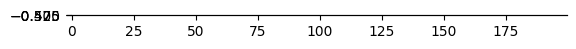

In [21]:
plt.imshow(scan.euler[:, :, 0].T)

In [ ]:
scan.compute_ipf_maps()

In [ ]:
plt.imshow(scan.ipf100.transpose(1, 0, 2))

In [ ]:
from pymicro.crystal.microstructure import Crystal
Crystal.fun_test()

In [ ]:
# CI field is not meaningful here
scan.ci = scan.phase.copy().astype(float)
scan.ci.min(), scan.ci.max()

In [ ]:
scan.segment_grains(tol=5., min_ci=0.0)

In [ ]:
# plot the segmented grain structure using a random color map: each color represents a grain
rand_cmap = Microstructure.rand_cmap(first_is_black=True)
plt.imshow(scan.grain_ids.T, cmap=rand_cmap, interpolation='nearest')
plt.show()

In [ ]:
# observe that the crystal symmetry is hexagonal
sym = scan.phase_list[0].get_symmetry()
print(sym)